# testing velocity fields

In [66]:
from os.path import join
import pandas as pd
from docopt import docopt
from datetime import datetime, timedelta
from distutils.util import strtobool

from parcels import FieldSet, ParticleSet, ErrorCode, AdvectionRK4, DiffusionUniformKh
seconds_per_day = 60*60*25
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean

In [4]:
import sys
sys.path.append('../')
from particles import LitterParticle, coastal_particles, entering_particles
from kernels import *
from fields import hycom_fieldset, jra55_fieldset, diffusion_field, unbeaching_field
import config

In [209]:
# temporal range
start_date = datetime(2020, 1, 1)
end_date = datetime(2021, 1, 1)

In [210]:
config.k_wind

0.01

In [211]:
dt = 0.25*seconds_per_day

In [212]:
f_current = hycom_fieldset(config.folder_current, start_date, end_date)  # hycom ocean

In [219]:
f_current.computeTimeChunk(100*seconds_per_day,200*seconds_per_day)

# parcels automatically converts velocity to ˚/s so we have to turn it off
# yucatan channel 
print(f_current.U.eval(0,0,22,-86, applyConversion=False)) 
print(f_current.V.eval(0,0,22,-86, applyConversion=False))

# florida straight
print(f_current.U.eval(0,0,24,-81.5, applyConversion=False)) 
print(f_current.V.eval(0,0,24,-81.5, applyConversion=False))

# mexico
print(f_current.U.eval(0,0,19.5,-99, applyConversion=False))
print(f_current.V.eval(0,0,19.5,-99, applyConversion=False))

0.111
1.108
1.0077453
0.4022479
0.0
0.0


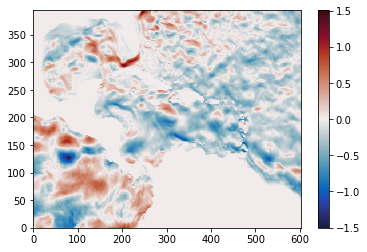

In [221]:
plt.pcolormesh(f_current.U.data[0],cmap=cmocean.cm.balance,norm=colors.CenteredNorm())
plt.colorbar()

In [222]:
f_wind = jra55_fieldset(config.folder_wind, start_date, end_date, 1.0)  # jra55 wind (100% of wind)

In [223]:
f_wind.computeTimeChunk(0, dt)

# parcels automatically converts velocity to ˚/s so we have to turn it off
# yucatan channel 
print(f_wind.U.eval(0,0,22,-86, applyConversion=False)) 
print(f_wind.V.eval(0,0,22,-86, applyConversion=False))

# florida straight
print(f_wind.U.eval(0,0,24,-81.5, applyConversion=False)) 
print(f_wind.V.eval(0,0,24,-81.5, applyConversion=False))

# mexico
print(f_wind.U.eval(0,0,19.5,-99, applyConversion=False))
print(f_wind.V.eval(0,0,19.5,-99, applyConversion=False))

-1.7356489
-4.3940206
-2.0387068
-4.03823
0.8463533
2.0429142


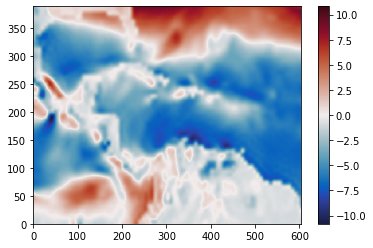

In [224]:
plt.pcolormesh(f_wind.U.data[0],cmap=cmocean.cm.balance,norm=colors.CenteredNorm())
plt.colorbar()

In [225]:
f_wind = jra55_fieldset(config.folder_wind, start_date, end_date, config.k_wind)  # jra55 wind (1% of wind)

In [226]:
f_wind.computeTimeChunk(0, 1*seconds_per_day)

# parcels automatically converts velocity to ˚/s so we have to turn it off
# yucatan channel 
print(f_wind.U.eval(0,0,22,-86, applyConversion=False)) 
print(f_wind.V.eval(0,0,22,-86, applyConversion=False))

# florida straight
print(f_wind.U.eval(0,0,24,-81.5, applyConversion=False))
print(f_wind.V.eval(0,0,24,-81.5, applyConversion=False))

# mexico
print(f_wind.U.eval(0.5*seconds_per_day,0,19.5,-99, applyConversion=False))
print(f_wind.V.eval(0.5*seconds_per_day,0,19.5,-99, applyConversion=False))

-0.017356489
-0.043940205
-0.020387068
-0.040382296
0.0007803079
0.014455486


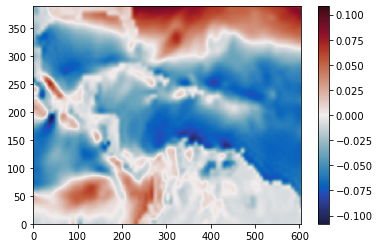

In [227]:
plt.pcolormesh(f_wind.U.data[0],cmap=cmocean.cm.balance,norm=colors.CenteredNorm())
plt.colorbar()

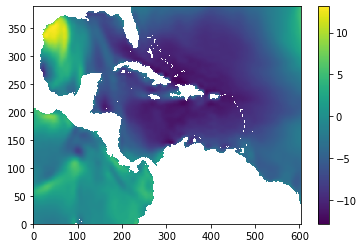

In [281]:
ds = xr.open_dataset('/nexsan/people/xbxu/HYCOM/GLBv0.08/2021w/JRA55_GLBv0.08_20210101_t000.nc')
plt.pcolormesh(ds.uwnd[0][slice(1500, 1889), slice(1012, 1616)])
plt.colorbar()
ds.close()

In [78]:
diffusion_field(f_current, 1)

In [92]:
f_current.Kh_meridional

array([[1.]], dtype=float32)

In [ ]:
import parcels.rng as ParcelsRandom

In [147]:
f_current.Kh_meridional[0,110,24,1110]

8.098704155503413e-11

In [148]:
f_current.Kh_zonal[0,0,0,0]

8.098704155503413e-11

In [207]:
# def BrownianMotion2D(particle, fieldset, time):

r = 1 / 3.
kh_meridional = f_current.Kh_meridional[0,0,0,0]
print(ParcelsRandom.uniform(-1, 1) * math.sqrt(2 * math.fabs(dt) * kh_meridional / r))
kh_zonal = f_current.Kh_zonal[0,0,0,0]
print(ParcelsRandom.uniform(-1, 1) * math.sqrt(2 * math.fabs(dt) * kh_zonal / r))

0.0022361088554468454
0.0014829992937454295


In [208]:
# def DiffusionUniformKh(particle, fieldset, time):
Kh = 1

# Wiener increment with zero mean and std of sqrt(dt)
dWx = ParcelsRandom.normalvariate(0, math.sqrt(math.fabs(dt)))
dWy = ParcelsRandom.normalvariate(0, math.sqrt(math.fabs(dt)))

bx = math.sqrt(2 * f_current.Kh_meridional[0,0,0,0])
by = math.sqrt(2 * f_current.Kh_zonal[0,0,0,0])

print(bx * dWx)
print(by * dWy)

-0.001162416806006505
-7.833874785880445e-06
